In [6]:
### This notebook is based on a version generously provided by Scott Pesme.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from diag_nets import *

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

sns.set(font_scale=1.1)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['text.usetex'] = True


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

import warnings
warnings.filterwarnings('ignore')
colors = ['olive', 'brown', 'pink', 'blue', 'orange', 'green', 'red', 'k', 'purple']
color_erm, color_erm_sam, color_sam_erm = 'red', 'orange', 'green'
label_size = 16


np.random.seed(0)
n = 20  # 20 / 40   # number of examples
n_test = 1000
d = 30  # 30 / 100  # dimension of features
r = 3  # 3 / 5   # sparsity

# generate random points
H = np.eye(d)
X = np.random.multivariate_normal(np.zeros(d), H, n)
X_test = np.random.multivariate_normal(np.zeros(d), H, n_test)

# generate sparse random gold model, corresponds to beta^*_ell_0 in paper
theta_star = np.random.randn(d)
theta_star[r:] = 0
theta_star = np.abs(theta_star) / np.linalg.norm(theta_star)

# generate labels
y = X @ theta_star
y_test = X_test @ theta_star

power = 4.0
num_iter = int(10**power) + 1
# iters_plot = np.unique(np.round(np.logspace(0, power, 501)))
# iters_plot = np.unique(np.round(np.linspace(0, num_iter, 101)))[:-1]
iters_loss_first = np.array(range(500))
iters_loss_log_scale = np.round(np.logspace(0, power, 201, dtype=int))
iters_loss = np.unique(np.concatenate((iters_loss_first, iters_loss_log_scale)))

GD (gamma=0.167): test loss 0.015056044189449145
n-SAM GD (gamma=0.167, rho=0.01): test loss 0.015143589149560004
n-SAM GD (gamma=0.167, rho=0.03): test loss 0.015321897396091098
n-SAM GD (gamma=0.167, rho=0.05): test loss 0.01550463129172701
n-SAM GD (gamma=0.167, rho=0.1): test loss 0.015981952251472867
n-SAM GD (gamma=0.167, rho=0.3): test loss 0.01824164203637632
n-SAM GD (gamma=0.167, rho=1.0): test loss 0.036064944890106775


<Figure size 640x480 with 0 Axes>

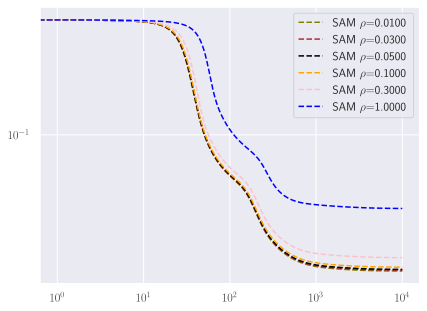

In [12]:
gamma = 5 / d
rhos = np.array([0.01, 0.03, 0.05, 0.1, 0.3, 1.0])  # for n-SAM
 
plt.figure(figsize = (15, 5))

u0, v0 = 0.1 * np.ones(d), 0.0 * np.ones(d)
train_losses_gd, test_losses_gd, _, _ = GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter, wd=0.0)
print('GD (gamma={:.3f}): test loss {}'.format(gamma, test_losses_gd[-1]))

# plt.subplot(1, 2, 1)
# plt.loglog(iters_loss, train_losses_gd, label = r'GD 'r'$\gamma$=' + "{:.4f}".format(gamma) , color=colors[0])
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.loglog(iters_loss, test_losses_gd , label = r'GD 'r'$\gamma$=' + "{:.4f}".format(gamma) , color=colors[0])
# plt.legend()

colors = ['olive', 'brown', 'black', 'orange', 'pink', 'blue', 'orange', 'green', 'red', 'k', 'purple']
for i, rho in enumerate(rhos):
    train_losses, test_losses, _, _ = n_SAM_GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter, rho=rho)
    print('n-SAM GD (gamma={:.3f}, rho={}): test loss {}'.format(gamma, rho, test_losses[-1]))
    
    # plt.subplot(1, 2, 1)
    # plt.loglog(iters_loss, train_losses, label = r'm-SAM 'r'$\rho$=' + "{:.4f}".format(rho) , color=colors[i+1], linestyle='--')
    # plt.legend()

    plt.subplot(1, 2, 2)
    plt.loglog(iters_loss, test_losses, label = r'SAM 'r'$\rho$=' + "{:.4f}".format(rho) , color=colors[i], linestyle='--')
    plt.legend()

plt.savefig('rho.png', bbox_inches='tight')
plt.show()

GD (gamma=0.500): test loss 0.016445781003091894
n-SAM GD (rho=0.001): test loss 0.016454906619612335
n-SAM GD (rho=0.003): test loss 0.01647319059869165
n-SAM GD (rho=0.01): test loss 0.016537530477455008
n-SAM GD (rho=0.03): test loss 0.01672437758055473
n-SAM GD (rho=0.1): test loss 0.017415777793749185
n-SAM GD (rho=0.3): test loss 0.019780264433419483
n-SAM GD (rho=0.9): test loss 0.03386849025971021
one-SAM GD (rho=0.001): test loss 0.016174901502986637
one-SAM GD (rho=0.003): test loss 0.015641003537756114
one-SAM GD (rho=0.01): test loss 0.013855445463941591
one-SAM GD (rho=0.03): test loss 0.009469059057662153
one-SAM GD (rho=0.1): test loss 0.0015339774886805673
one-SAM GD (rho=0.3): test loss 6.350067483945958e-09
one-SAM GD (rho=0.9): test loss nan


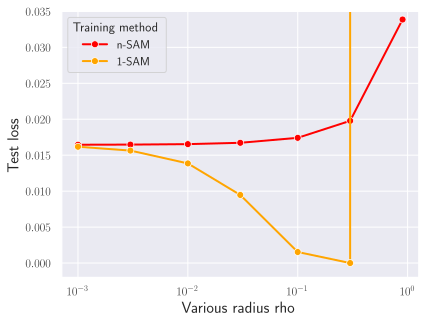

In [3]:
# Grid search for n-SAM vs. 1-SAM
test_losses_gs_nsam, test_losses_gs_1sam = [], []

gamma = 15 / d 
u0, v0 = 0.1 * np.ones(d), 0.0 * np.ones(d)

np.random.seed(0)
n = 20  # 20 / 40   # number of examples
n_test = 1000
d = 30  # 30 / 100  # dimension of features
r = 3  # 3 / 5   # sparsity

# generate random points
H = np.eye(d)
X = np.random.multivariate_normal(np.zeros(d), H, n)
X_test = np.random.multivariate_normal(np.zeros(d), H, n_test)
# generate sparse random gold model, corresponds to beta^*_ell_0 in paper
theta_star = np.random.randn(d)
theta_star[r:] = 0
theta_star = np.abs(theta_star) / np.linalg.norm(theta_star)
# generate labels
y = X @ theta_star
y_test = X_test @ theta_star

power = 4.0
num_iter = int(10**power) + 1
# iters_plot = np.unique(np.round(np.logspace(0, power, 501)))
# iters_plot = np.unique(np.round(np.linspace(0, num_iter, 101)))[:-1]
iters_loss_first = np.array(range(500))
iters_loss_log_scale = np.round(np.logspace(0, power, 201, dtype=int))
iters_loss = np.unique(np.concatenate((iters_loss_first, iters_loss_log_scale)))




train_losses_gd, test_losses_gd, _, _ = GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter)
print('GD (gamma={:.3f}): test loss {}'.format(gamma, test_losses_gd[-1]))

rhos_nsam = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.9])
for i, rho in enumerate(rhos_nsam):
    train_losses_nsam, test_losses_nsam, _, _ = n_SAM_GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter, rho=rho)
    val_to_plot = test_losses_nsam[-1] if not np.isnan(test_losses_nsam[-1]) else 999
    test_losses_gs_nsam.append(val_to_plot)
    print('n-SAM GD (rho={}): test loss {}'.format(rho, test_losses_nsam[-1]))

rhos_1sam = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.9])
for i, rho in enumerate(rhos_1sam):
    train_losses_1sam, test_losses_1sam, _, _ = one_SAM_GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter, rho=rho)
    val_to_plot = test_losses_1sam[-1] if not np.isnan(test_losses_1sam[-1]) else 999
    test_losses_gs_1sam.append(val_to_plot)
    print('one-SAM GD (rho={}): test loss {}'.format(rho, test_losses_1sam[-1]))


# Plot of the grid search
marker_size, line_width = 7.0, 2.0

# ax = sns.lineplot(x=[rhos_nsam[0], rhos_nsam[-1]], y=[test_losses_gd[-1], test_losses_gd[-1]], linewidth=line_width, marker='o', markersize=marker_size, label='ERM', color='silver')
ax = sns.lineplot(x=rhos_nsam, y=test_losses_gs_nsam, linewidth=line_width, marker='o', markersize=marker_size, label='n-SAM', color='red')
ax = sns.lineplot(x=rhos_1sam, y=test_losses_gs_1sam, linewidth=line_width, marker='o', markersize=marker_size, label='1-SAM', color='orange')

ax.set_xlabel('Various radius rho', size=label_size)
ax.set_ylabel('Test loss', size=label_size)
ax.set_xscale('log')  
# ax.set_yscale('log')  
ax.set_ylim(-0.002, 0.035)
ax.legend(title='Training method', loc='best')
# plt.savefig('plots/diag_nets_gd_nsam_1sam.pdf', bbox_inches='tight')
plt.show()

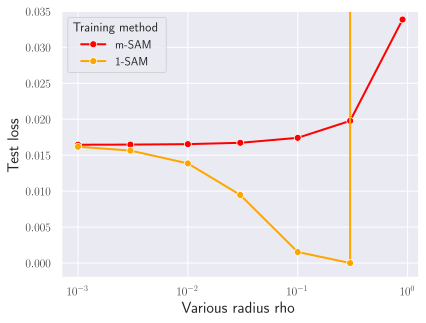

In [5]:
ax = sns.lineplot(x=rhos_nsam, y=test_losses_gs_nsam, linewidth=line_width, marker='o', markersize=marker_size, label='m-SAM', color='red')
ax = sns.lineplot(x=rhos_1sam, y=test_losses_gs_1sam, linewidth=line_width, marker='o', markersize=marker_size, label='1-SAM', color='orange')

ax.set_xlabel('Various radius rho', size=label_size)
ax.set_ylabel('Test loss', size=label_size)
ax.set_xscale('log')  
# ax.set_yscale('log')  
ax.set_ylim(-0.002, 0.035)
ax.legend(title='Training method', loc='best')
plt.savefig('m-sharpness.png', bbox_inches='tight')
plt.show()